In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
koi_data=pd.read_csv('Training_data.csv')
tess_data=pd.read_csv('testing_tess.csv')

In [66]:
koi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7325 entries, 0 to 7324
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_period       7325 non-null   float64
 1   koi_time0bk      7325 non-null   float64
 2   koi_duration     7325 non-null   float64
 3   koi_depth        7325 non-null   float64
 4   ra               7325 non-null   float64
 5   dec              7325 non-null   float64
 6   koi_kepmag       7325 non-null   float64
 7   koi_disposition  7325 non-null   object 
dtypes: float64(7), object(1)
memory usage: 457.9+ KB


In [67]:
columns=koi_data.columns

In [68]:
columns

Index(['koi_period', 'koi_time0bk', 'koi_duration', 'koi_depth', 'ra', 'dec',
       'koi_kepmag', 'koi_disposition'],
      dtype='object')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

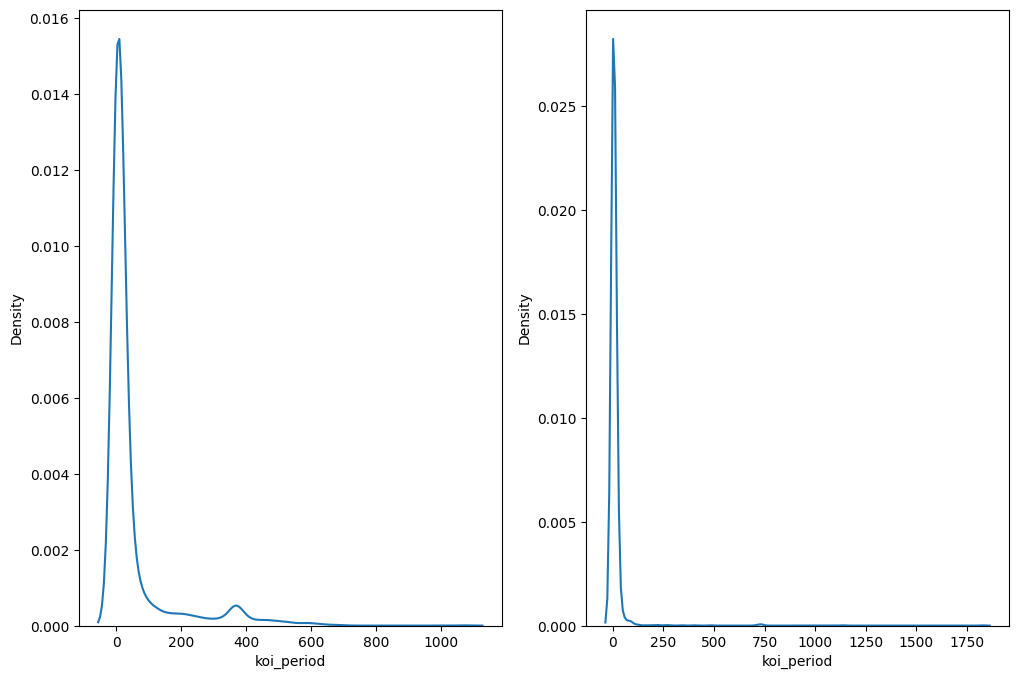

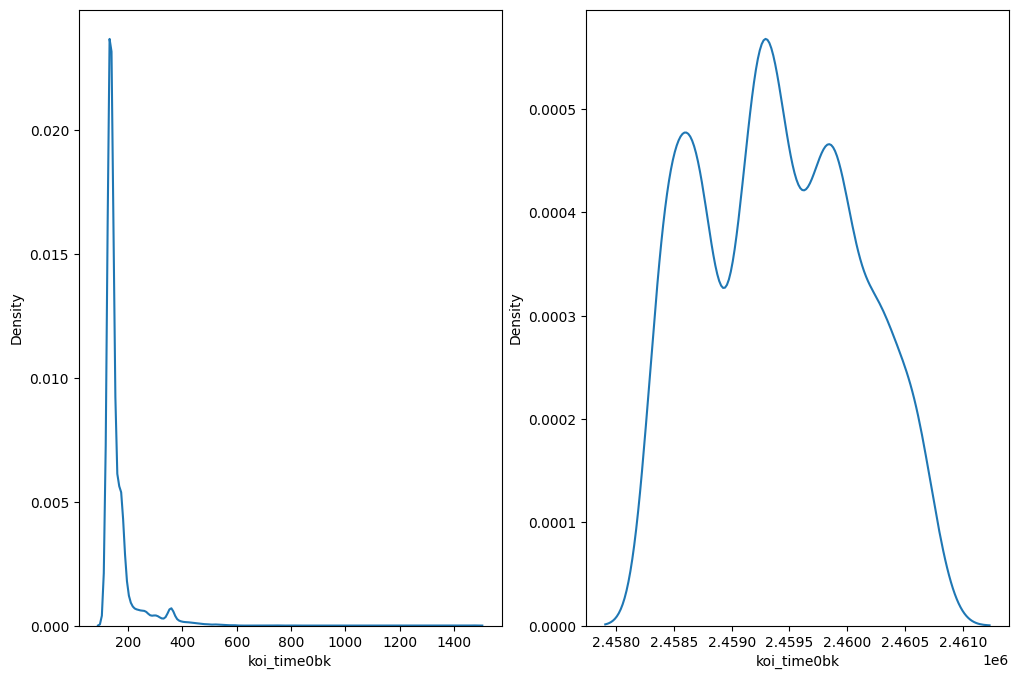

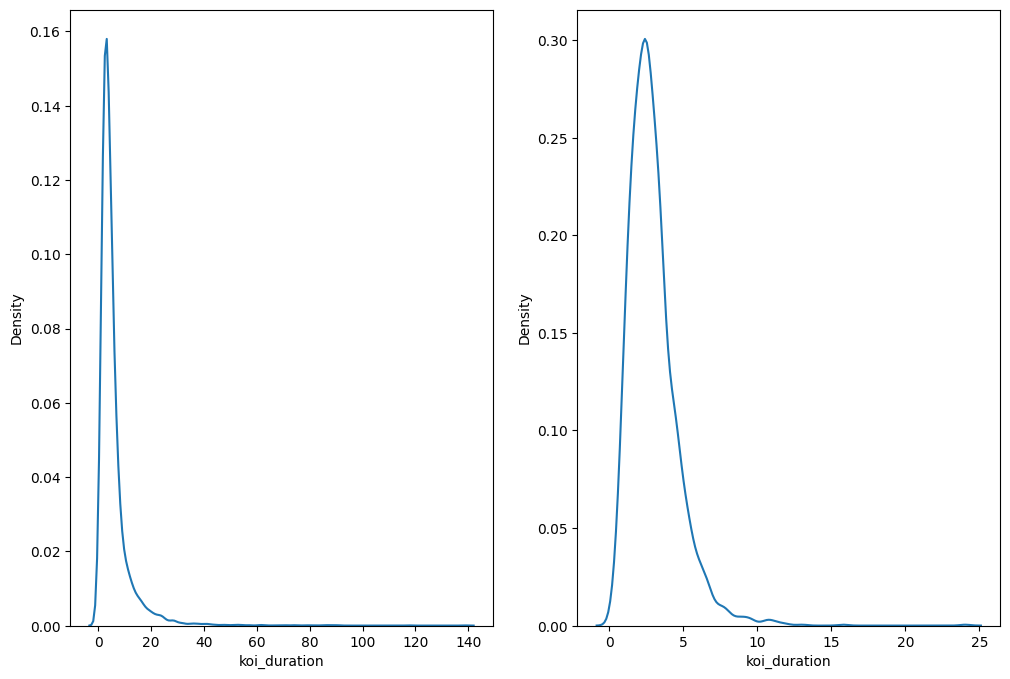

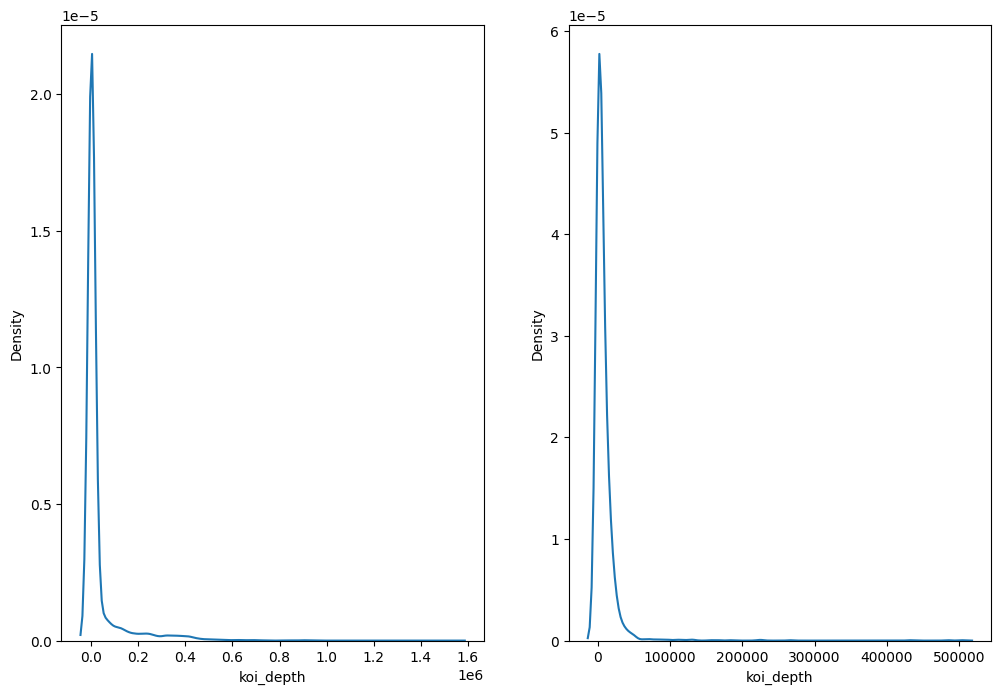

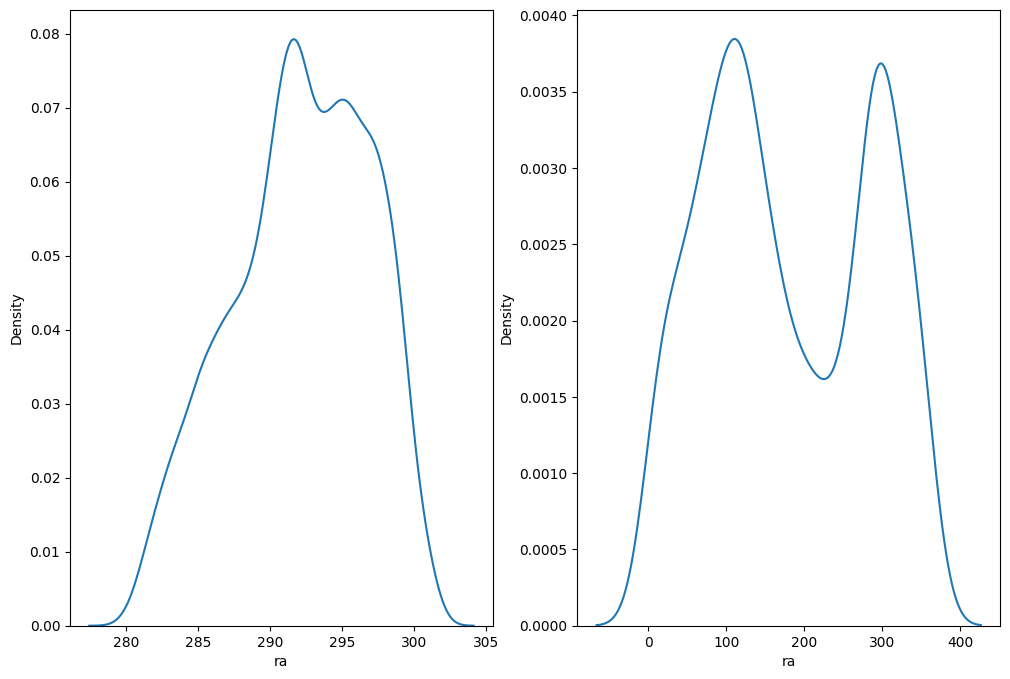

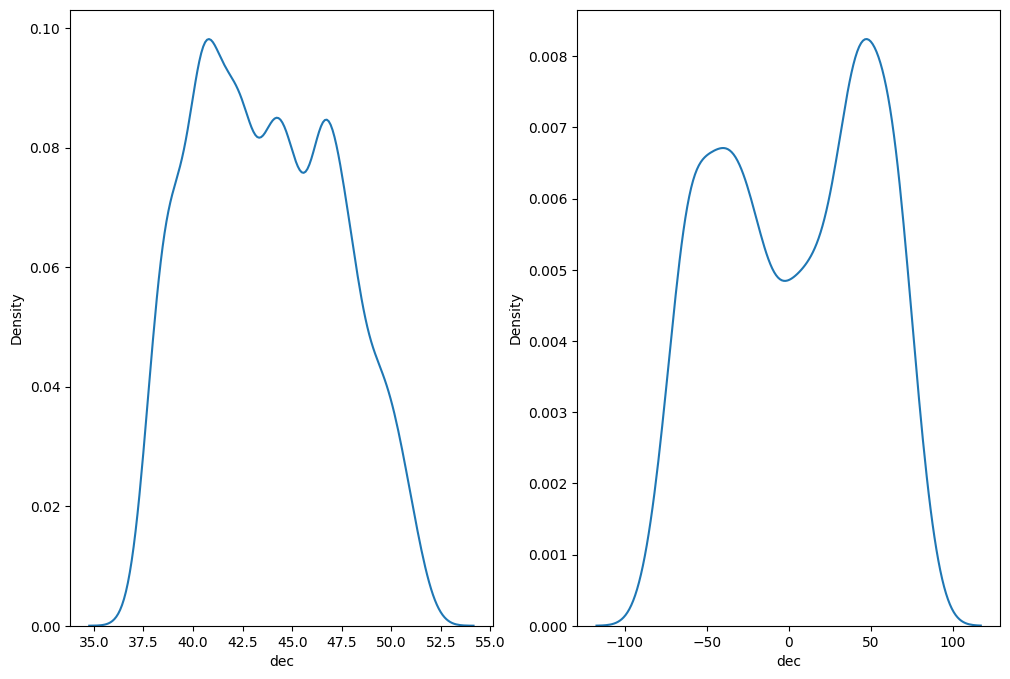

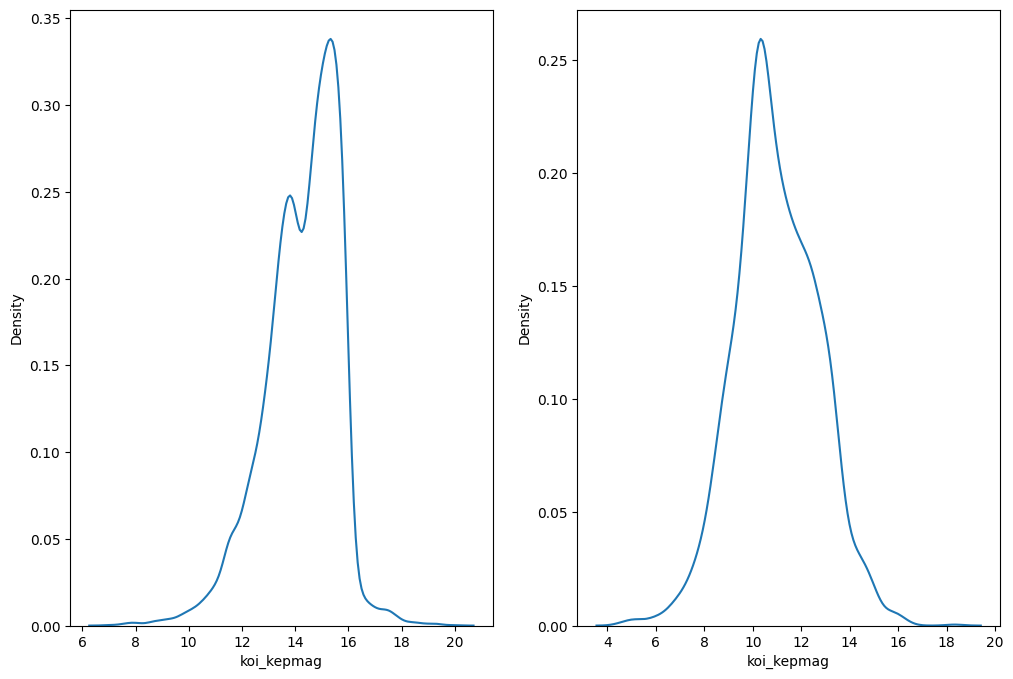

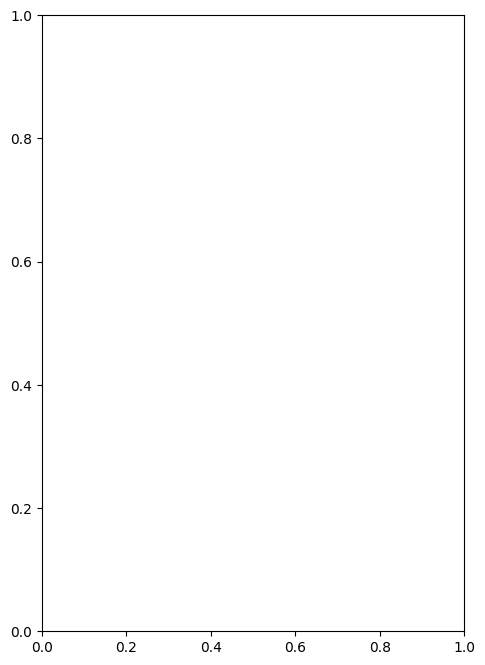

In [69]:
for col in columns:
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    sns.kdeplot(koi_data[col])
    plt.subplot(122)
    sns.kdeplot(tess_data[col])

In [70]:
from sklearn.preprocessing import StandardScaler

# separate target from features
koi_target = koi_data['koi_disposition']
koi_features = koi_data.drop(columns=['koi_disposition'])

tess_target = tess_data['koi_disposition']
tess_features = tess_data.drop(columns=['koi_disposition'])

# fit scaler on training data (koi) and transform both
scaler = StandardScaler()
koi_features_scaled = scaler.fit_transform(koi_features)
tess_features_scaled = scaler.fit_transform(tess_features)

# convert back to DataFrame with same column names
koi_features_scaled = pd.DataFrame(koi_features_scaled, columns=koi_features.columns, index=koi_features.index)
tess_features_scaled = pd.DataFrame(tess_features_scaled, columns=tess_features.columns, index=tess_features.index)

# re-attach target column
koi_data = pd.concat([koi_features_scaled, koi_target], axis=1)
tess_data = pd.concat([tess_features_scaled, tess_target], axis=1)

print("Standardization applied. koi_data shape:", koi_data.shape, "tess_data shape:", tess_data.shape)

Standardization applied. koi_data shape: (7325, 8) tess_data shape: (2527, 8)


In [71]:
koi_data.to_csv('Training_data.csv',index=False)
tess_data.to_csv('testing_tess.csv',index=False)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

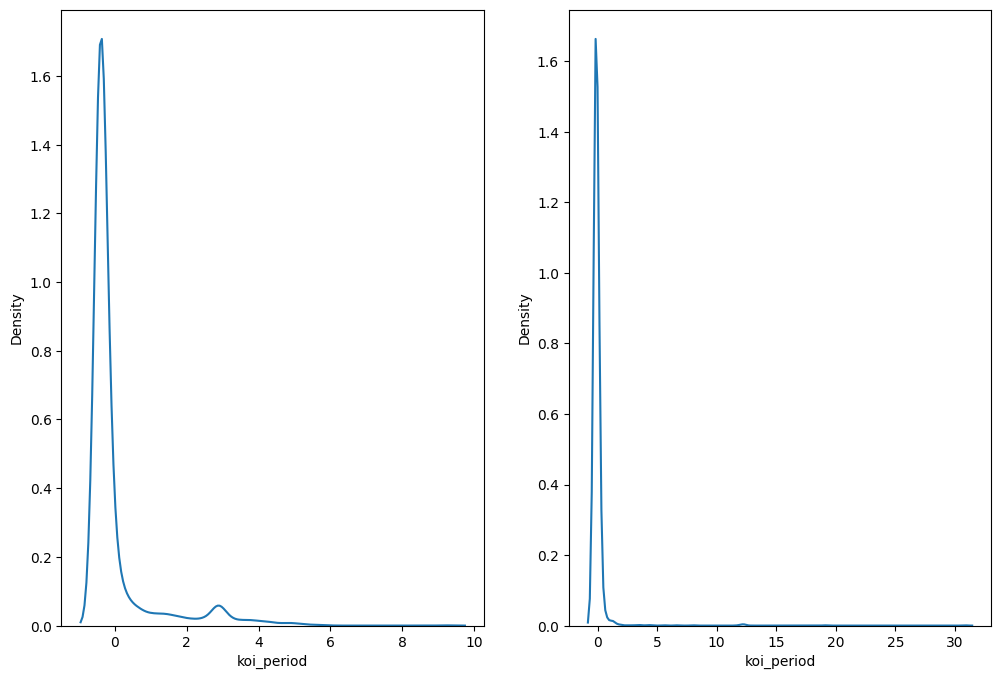

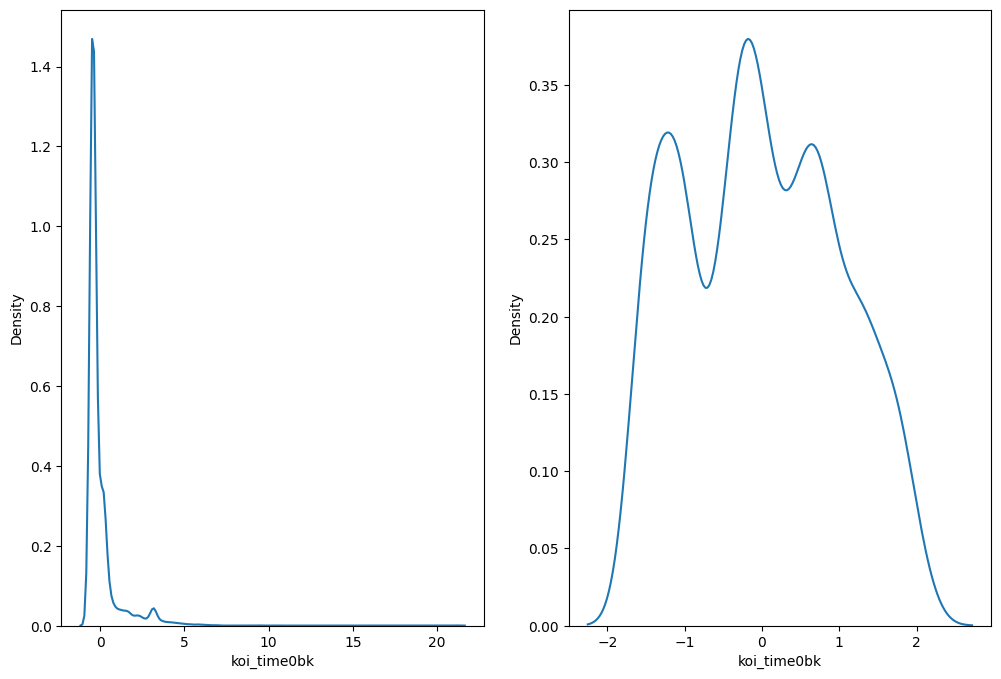

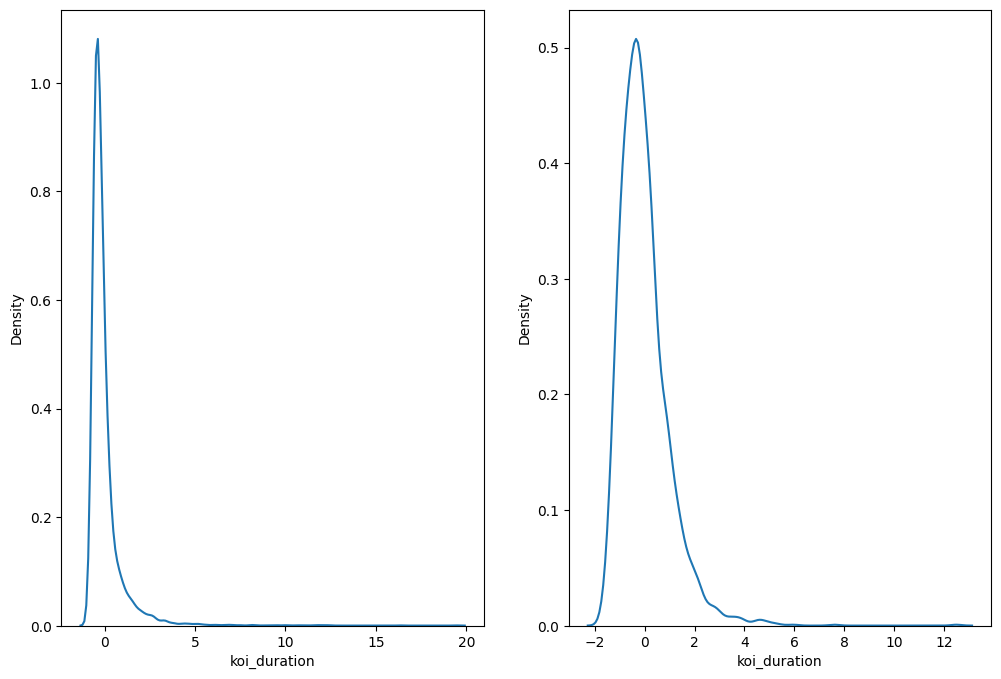

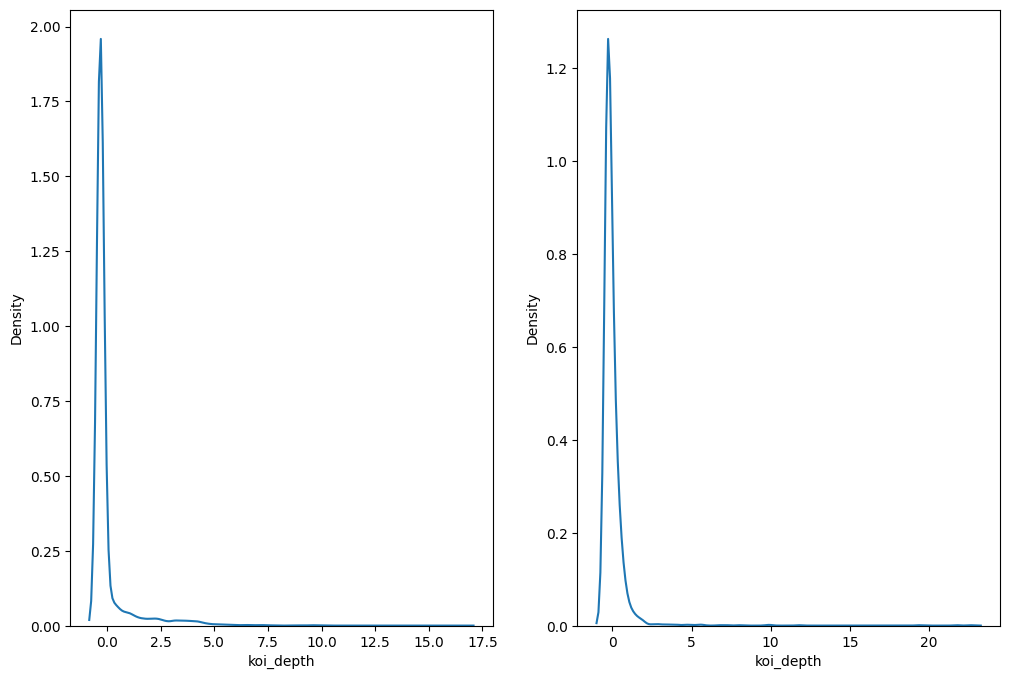

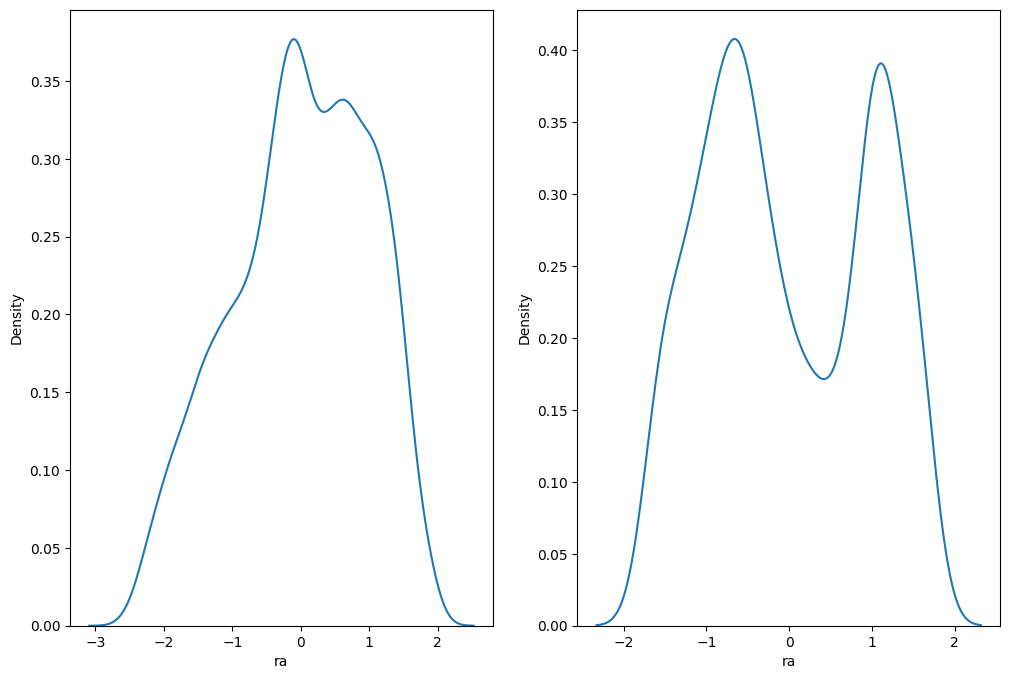

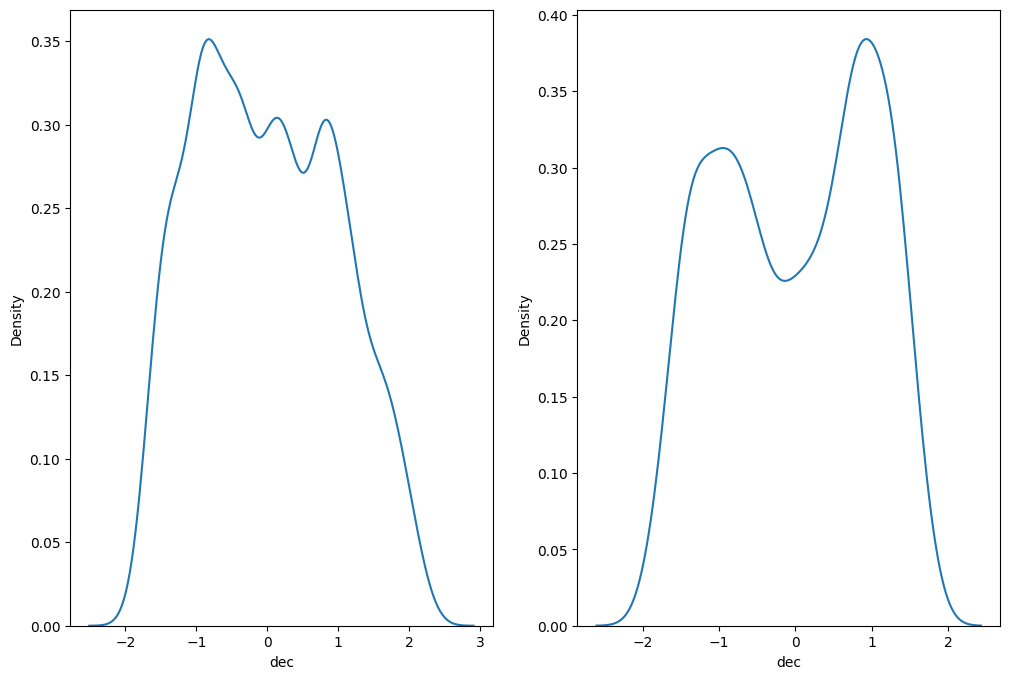

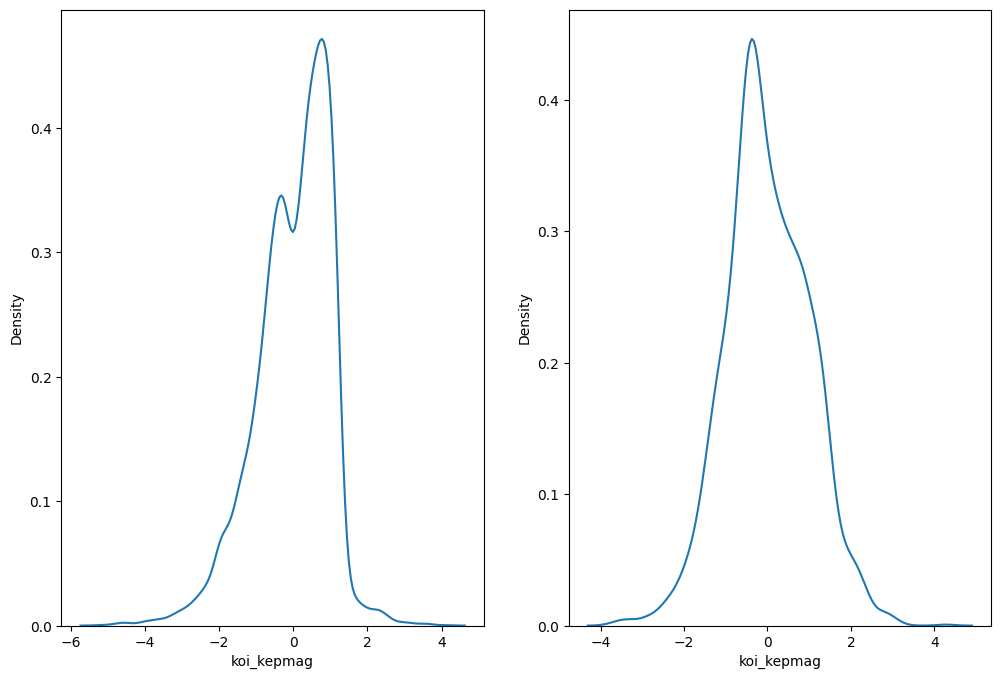

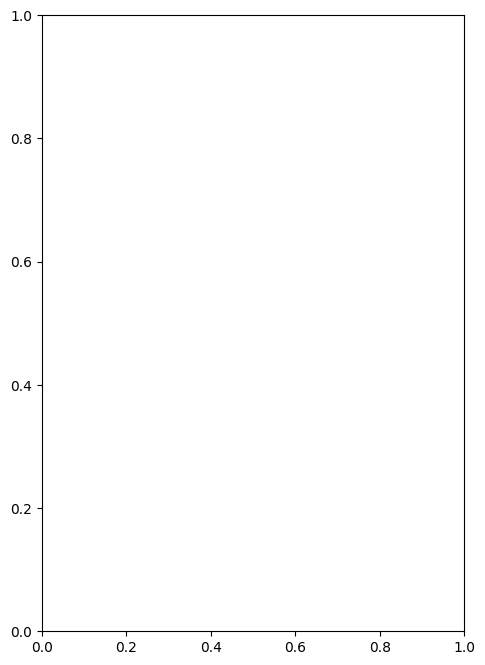

In [72]:
for col in columns:
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    sns.kdeplot(koi_data[col])
    plt.subplot(122)
    sns.kdeplot(tess_data[col])